In [1]:
import numpy as np
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import powerlaw
import itertools
from tqdm.notebook import tqdm
import sys
import os

# Add the parent directory (where 'ants' is located) to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from ants.model import AntWorld
from ants.agent import Environment, Ant, Food, Home, Predator
from ants.config import WIDTH, HEIGHT, EVAPORATE, DIFFUSION, INITDROP, LOWERBOUND, PROB_RANDOM, DROP_RATE, DECAY_RATE, MAX_STEPS_WITHOUT_FOOD, BIRTH_RATE, CONSUMPTION_RATE, CARRYING_CAPACITY, NUM_PREDATORS, NUM_FOOD_LOCS, NUM_ANTS, MAX_STEPS_WITHOUT_ANTS, REPRODUCTION_THRESHOLD, PREDATOR_LIFETIME

import warnings
warnings.filterwarnings('ignore')

In [2]:
def run_simulation(params, max_steps, output_dir="simulation_results"):
    
    model = AntWorld(**params)

    ant_sizes = np.linspace(1, 200, 10)
    os.makedirs(output_dir, exist_ok=True)
    
    model = AntWorld(**params)
    for step in tqdm(range(max_steps), desc="Simulation Progress", unit="step"):
        model.step()

        if not model.running:
            break

    #get the model.pher_count_list
    pher_count_list = model.pher_count_list
    return pher_count_list


In [5]:
folder = "simulation_results"

max_steps = 500
repetitions = 2
num_ants = [50,100,500]

params = {
    "height": HEIGHT,
    "width": WIDTH,
    "evaporate": EVAPORATE,
    "diffusion": DIFFUSION,
    "initdrop": INITDROP,
    "lowerbound": LOWERBOUND,
    "prob_random": PROB_RANDOM,
    "drop_rate": DROP_RATE,
    "decay_rate": DECAY_RATE,
    "max_steps_without_food": MAX_STEPS_WITHOUT_FOOD,
    "birth_rate": BIRTH_RATE,
    "consumption_rate": CONSUMPTION_RATE,
    "carrying_capacity": CARRYING_CAPACITY,
    "num_predators": NUM_PREDATORS,
    "num_food_locs": NUM_FOOD_LOCS,
    "num_ants": 0,
    "max_steps_without_ants": MAX_STEPS_WITHOUT_ANTS,
    "reproduction_threshold": REPRODUCTION_THRESHOLD,
    "predator_lifetime": PREDATOR_LIFETIME
}

Running simulations:   0%|          | 0/2 [00:00<?, ?it/s]

Making World
Making World


Simulation Progress:   0%|          | 0/500 [00:00<?, ?step/s]

Making World
Making World


Simulation Progress:   0%|          | 0/500 [00:00<?, ?step/s]

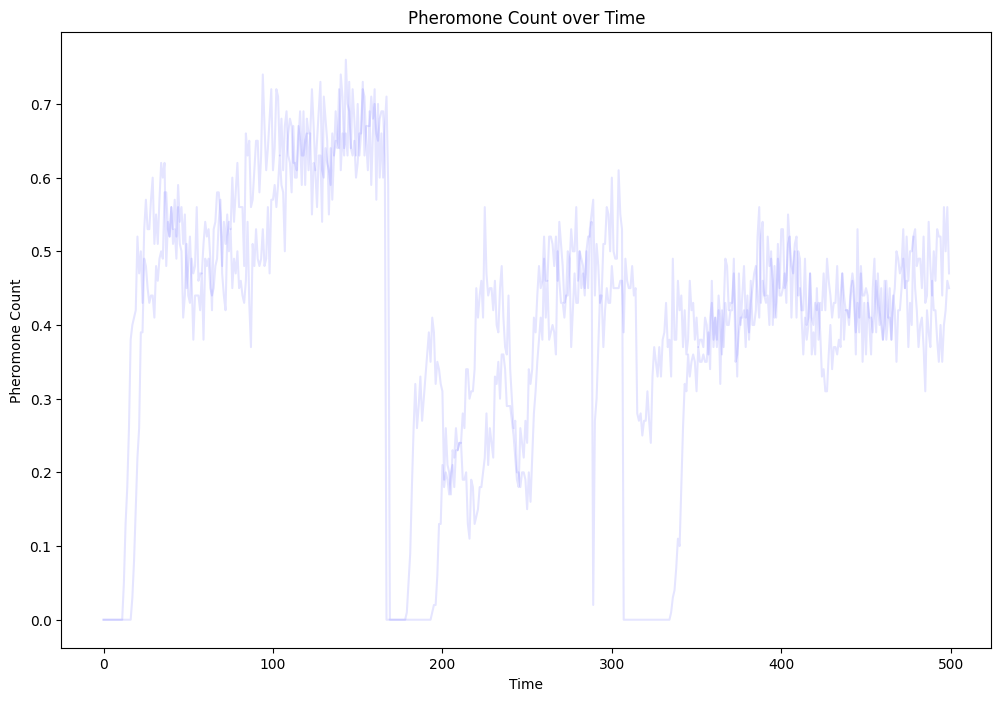

In [6]:
plt.figure(figsize=(12,8))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
for num_ant in num_ants:
    params["num_ants"] = num_ant
    pher_count_list = run_simulation(params, max_steps)
    plt.plot(pher_count_list, label=f"Num Ants: {num_ant}", color=colors.pop(0))


plt.xlabel("Time")
plt.ylabel("Pheromone Count")
plt.title("Pheromone Count over Time")
plt.show()